# Task 1: Acquire, Preprocess, and Analyze the Data


## DataSet Analysis - White Wine Quality DataSet

Link:https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Note: Only the white wine dataset will be used. The dataset includes 12 features with the values being a ranking from 1-10. In order to keep the classification binary, I will set qualities equal to or greater than 6 as good wine (value of 1) and any other quality value as bad wine (value of 0)


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# Load the Red Wines dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data = pd.read_csv(URL, sep =';')


data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# Change Quality Values to 1 (good wine) or 0 (bad wine)
data["quality"] = 1*(data["quality"]>5)

print(data["quality"])
data.head(10)

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int32


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


In [6]:
#Note above the displayed length is the total number of wines
#Get some basic statistics of the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [7]:
 #Number of wines with good and bad quality
    
wine_good = data.loc[(data['quality'] == 1)] 
number_of_good_wine = wine_good.shape[0]

wine_bad = data.loc[(data['quality'] == 0)]
number_of_bad_wine = wine_bad.shape[0]

print("Total Number of Wines = " + str(number_of_good_wine + number_of_bad_wine))
print("Number of Good Quality Wines = " + str(number_of_good_wine))
print("Number of Bad Quality Wines = " + str(number_of_bad_wine))

Total Number of Wines = 4898
Number of Good Quality Wines = 3258
Number of Bad Quality Wines = 1640


In [8]:
#Percentage of Good to Bad
Percentage_of_Good = (number_of_good_wine/(number_of_bad_wine+number_of_good_wine))*100

print("Percentage of Good Quality Wines = " + str(int(Percentage_of_Good)) + '%')

Percentage of Good Quality Wines = 66%


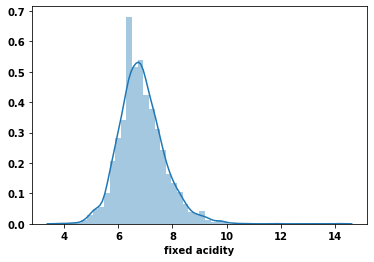

In [9]:
#Plot the Distributions of the features
sns.distplot(data['fixed acidity'])

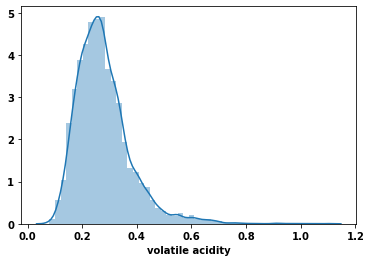

In [10]:
sns.distplot(data['volatile acidity'])

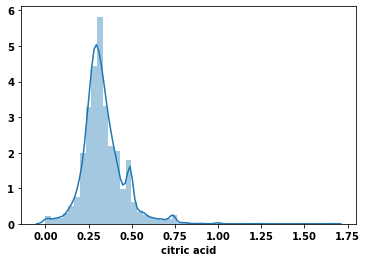

In [11]:
sns.distplot(data['citric acid'])

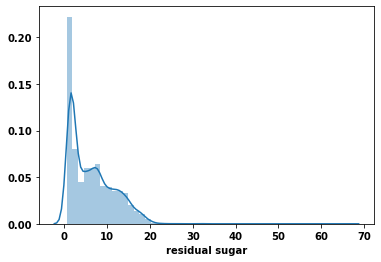

In [12]:
sns.distplot(data['residual sugar'])

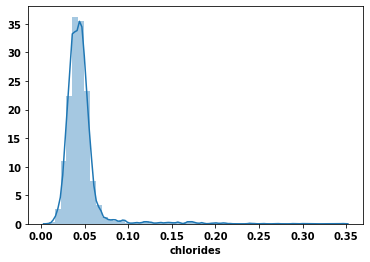

In [13]:
sns.distplot(data['chlorides'])

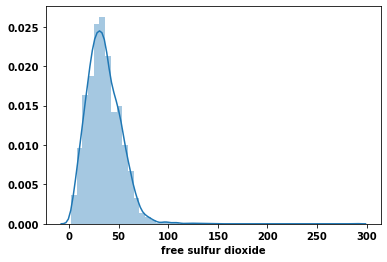

In [14]:
sns.distplot(data['free sulfur dioxide'])

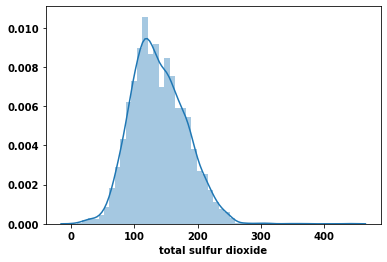

In [15]:
sns.distplot(data['total sulfur dioxide'])

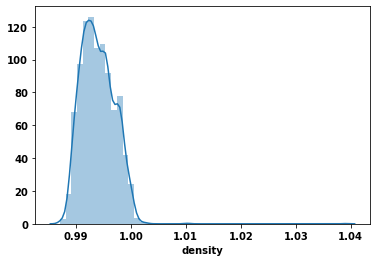

In [16]:
sns.distplot(data['density']);

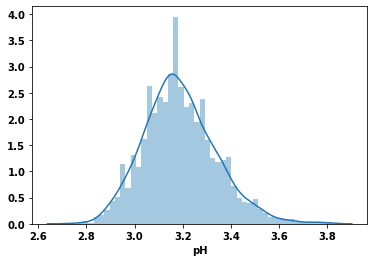

In [17]:
sns.distplot(data['pH'])

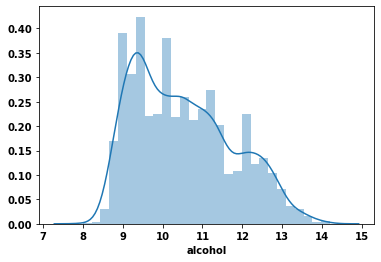

In [18]:
sns.distplot(data['alcohol'])

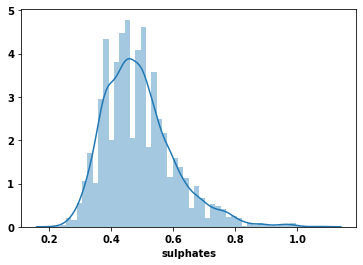

In [19]:
sns.distplot(data['sulphates'])

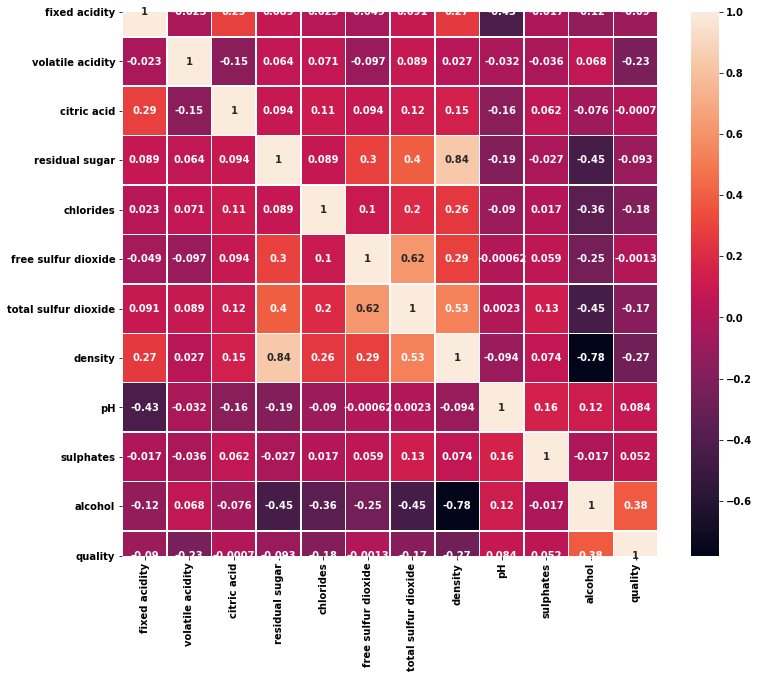

In [20]:
#Correlation between Features
corr = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, linewidths=0.5, linecolor="white")

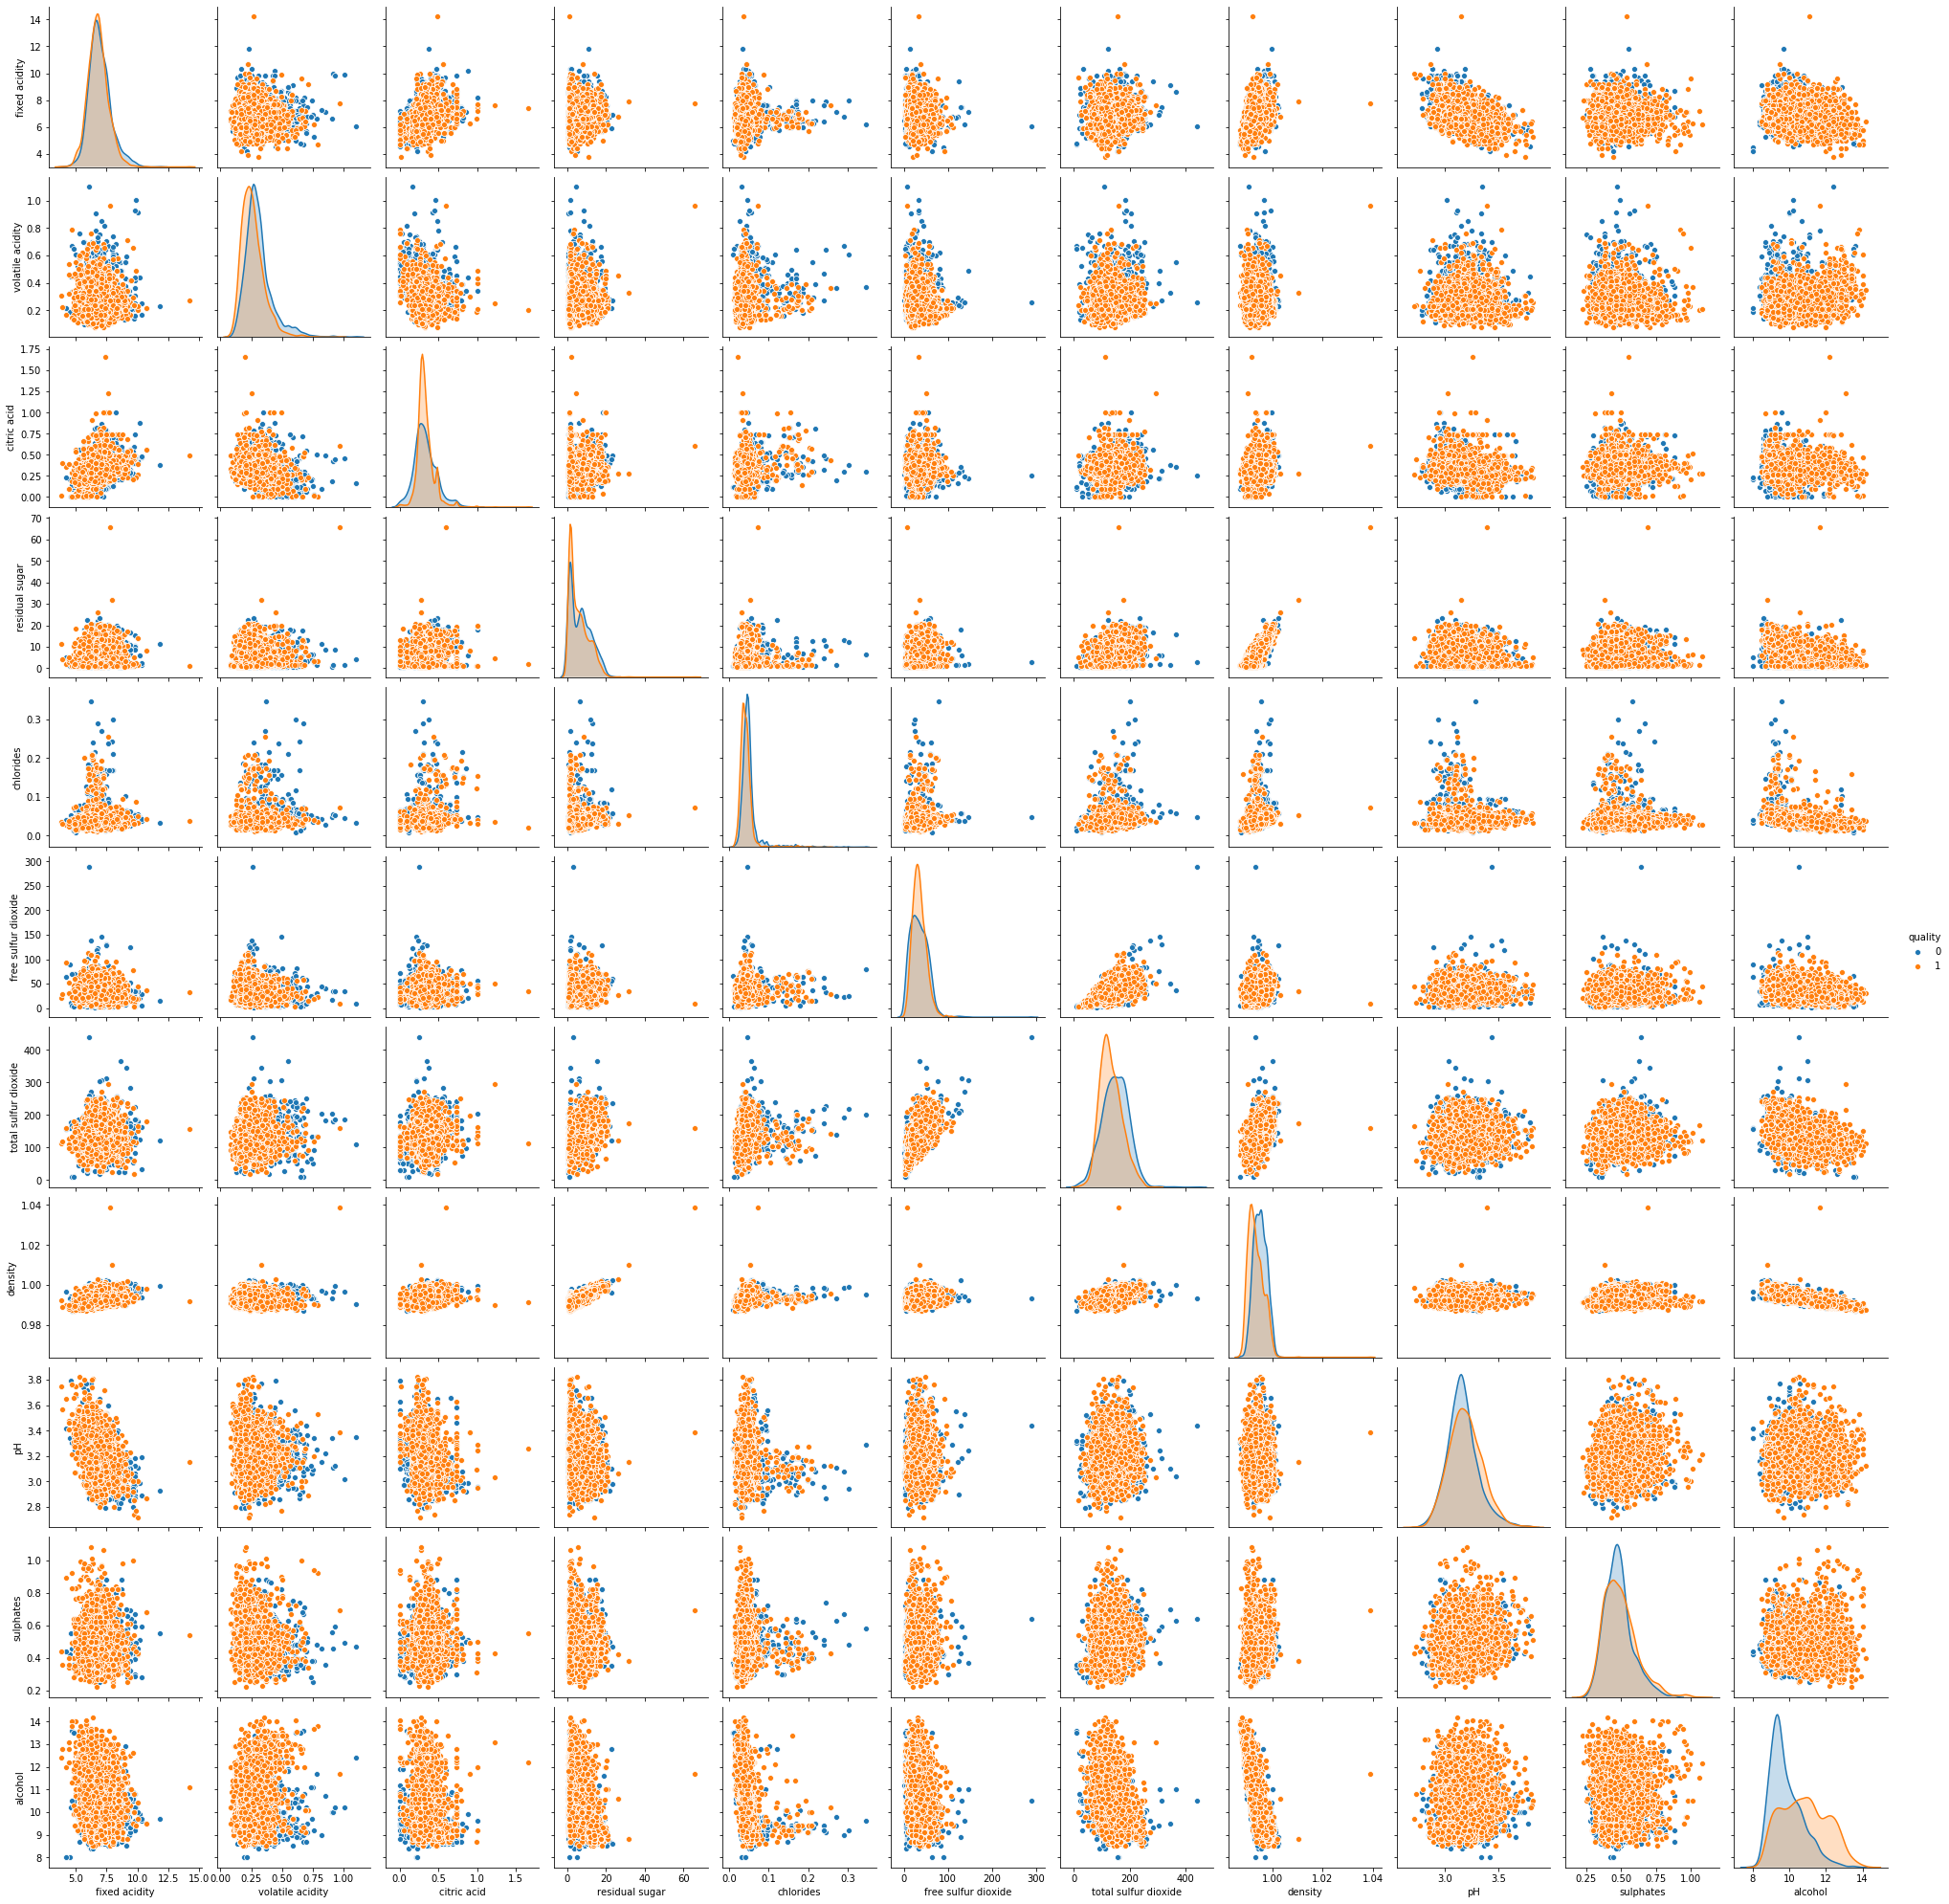

In [20]:
#Scatter Plot of Pair Wise Features
Scatter = sns.pairplot(data, hue = "quality")

#Need to reduce this to smaller subsets of features as the plot is useless

In [21]:
# Distributions for Good and Bad Wines
good = data['quality'] == 1
good_data = data[good]
bad = data['quality'] == 0
bad_data = data[bad]

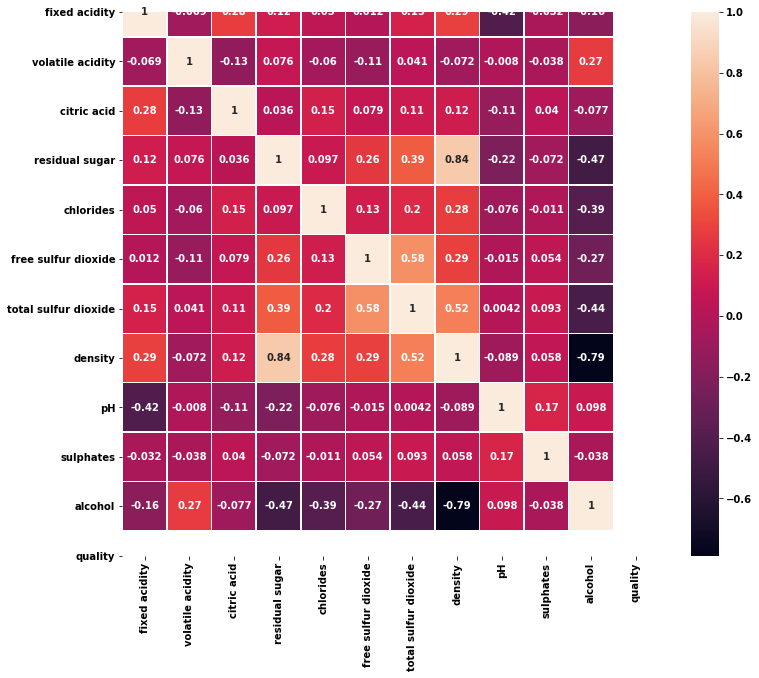

In [22]:
#Correlation for good results
good_corr = good_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(good_corr, annot=True, linewidths=0.5, linecolor="white")

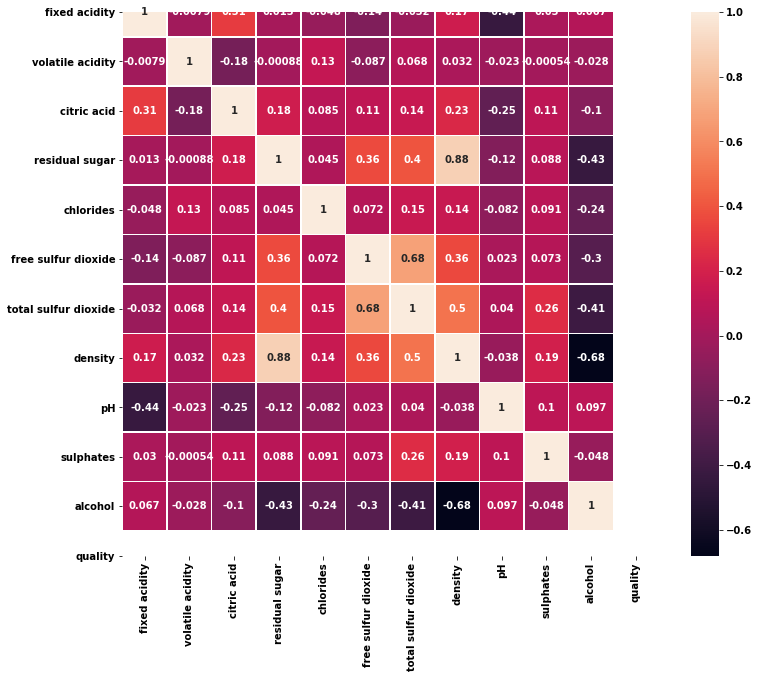

In [23]:
#Correlation for negative results
bad_corr = bad_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(bad_corr, annot=True, linewidths=0.5, linecolor="white")

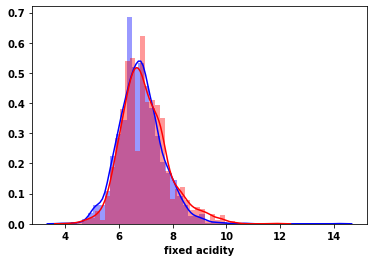

In [24]:
#Distribution of the good vs bad

sns.distplot(good_data['fixed acidity'], color = 'b')
sns.distplot(bad_data['fixed acidity'], color = 'r')


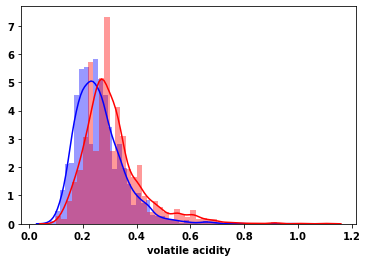

In [25]:
sns.distplot(good_data['volatile acidity'], color = 'b')
sns.distplot(bad_data['volatile acidity'], color = 'r')

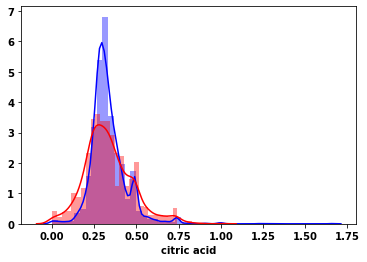

In [26]:
sns.distplot(good_data['citric acid'], color = 'b')
sns.distplot(bad_data['citric acid'], color = 'r')

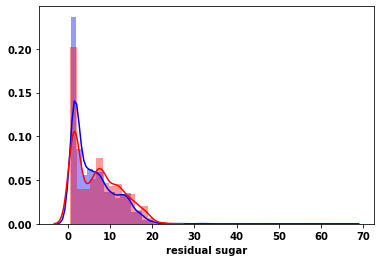

In [27]:
sns.distplot(good_data['residual sugar'], color = 'b')
sns.distplot(bad_data['residual sugar'], color = 'r')

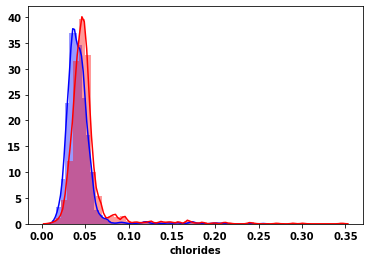

In [28]:
sns.distplot(good_data['chlorides'], color = 'b')
sns.distplot(bad_data['chlorides'], color = 'r')

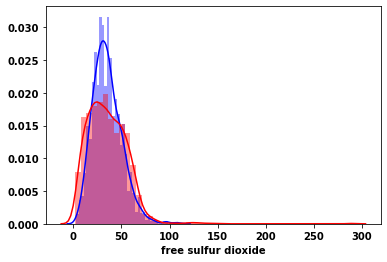

In [29]:
sns.distplot(good_data['free sulfur dioxide'], color = 'b')
sns.distplot(bad_data['free sulfur dioxide'], color = 'r')

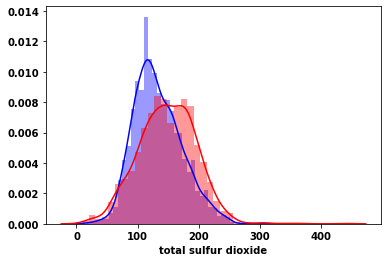

In [30]:
sns.distplot(good_data['total sulfur dioxide'], color = 'b')
sns.distplot(bad_data['total sulfur dioxide'], color = 'r')

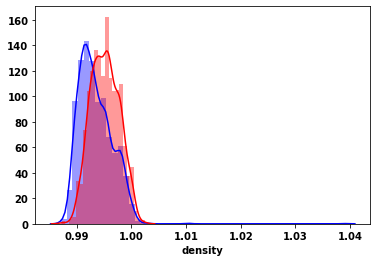

In [31]:
sns.distplot(good_data['density'], color = 'b');
sns.distplot(bad_data['density'], color = 'r');

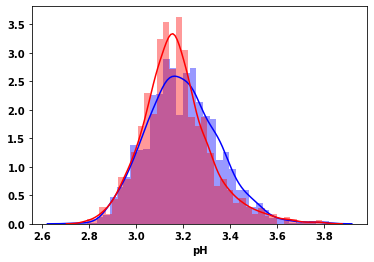

In [32]:
sns.distplot(good_data['pH'], color = 'b')
sns.distplot(bad_data['pH'], color = 'r')

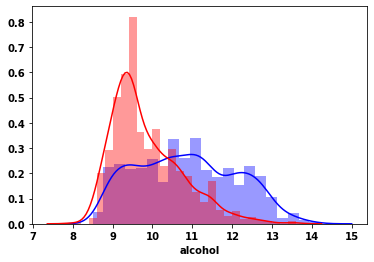

In [33]:
sns.distplot(good_data['alcohol'], color = 'b')
sns.distplot(bad_data['alcohol'], color = 'r')

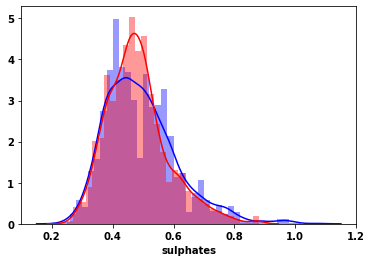

In [34]:
sns.distplot(good_data['sulphates'], color = 'b')
sns.distplot(bad_data['sulphates'], color = 'r')

In [35]:
# Split Data between Training and Test Data (80/20 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = data.copy()
train_set = data_copy.sample(frac=0.80, random_state=0)
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = float)
y_train = np.array(train_set["quality"], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = float)
y_test = np.array(test_set["quality"], dtype = int)

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (3918, 11)
y_train size:  (3918,)
x_test size:  (980, 11)
y_test size:  (980,)


In [ ]:
#Normalize the Data

x_test_mean = np.mean(x_test, axis = 0)
x_test_std = np.std(x_test, axis = 0)

#np.seterr(divide='ignore', invalid='ignore')
x_test = (x_test - x_test_mean)/x_test_std


x_train_mean = np.mean(x_train, axis = 0)
#print(x_train_mean)
x_train_std = np.std(x_train, axis = 0)
#print(x_train_std)

#np.seterr(divide='ignore', invalid='ignore')
x_train = (x_train - x_train_mean)/x_train_std
#print(x_train[:10,:])

print("x_train size: ", x_train.shape)
print("x_test size: ", x_test.shape)